In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
xx, yy = np.meshgrid(
    np.arange(256),
    np.arange(256))

img = np.zeros((256,256))

rr0 = (xx-90)**2 + (yy-80)**2
img[rr0<30**2]=70.0

#Contiguous region
rr1 = (xx-90)**2/40**2 + (yy-80)**2/70**2
img[(rr0>30.0**2)*(rr1<1.0)]=10.0

noise = np.random.normal(0, 1, img.shape)

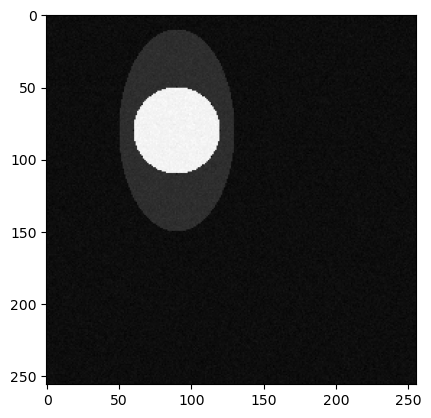

In [69]:
img = img + noise

plt.imshow(img,cmap='gray')

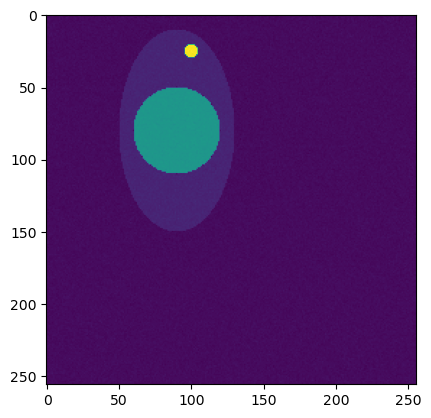

In [70]:
# Using a seed

S = (100,25)
x0, y0 = S

flag = np.zeros(img.shape)
flag[((xx-x0)**2 + (yy-y0)**2 < 5**2)] = 125

plt.imshow(img+flag)

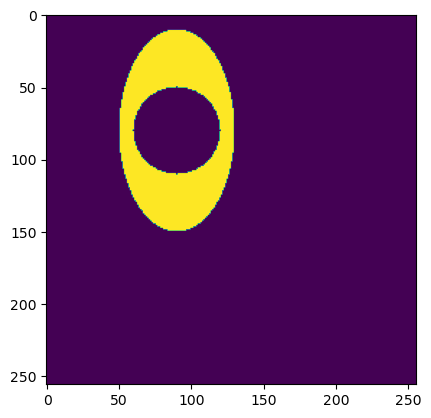

In [71]:
# Start a flood-filling like process

def distance(x0, y0, x1, y1, I):
    v0 = I[y0,x0]
    v1 = I[y1,x1]
    return abs(v1 - v0)

def N4(x0, y0, M, N):
    #Use a base structure

    neigh=[]
    if x0 + 1 < M:
        neigh.append((x0+1,y0))
    if 0 < x0 -1:
        neigh.append((x0-1,y0))
    if y0+1 < N:
        neigh.append((x0,y0+1))
    if 0 < y0-1:
        neigh.append((x0,y0-1))
    return neigh

def grow(x0, y0, I, T, d, max_it = 1e6):

    mask=np.zeros(I.shape)
    visited=np.zeros(I.shape)
    N, M=I.shape
    S=[]
    S.append((x0,y0))
    it = 0
    while(len(S)>0):
        x0,y0=S.pop()
        for x1,y1 in N4(x0,y0,M,N):
            if distance(x0,y0,x1,y1,I) <= T and mask[y1,x1]==0 and visited[y1,x1]==0:
                S.append((x1,y1))
        mask[y0,x0]=1
        visited[y0,x0]=1
        it = it + 1
        if it > max_it:
            print("Overwrog")
            break
    return mask

mask = grow(100,25, img, 4, distance)

plt.imshow(mask)